In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [7]:
data = pd.read_csv("data/CC_GENERAL.csv").iloc[:,1:].dropna()
data.head(8)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12


In [ ]:
no_labeled_data

In [11]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [12]:
data = np.array(data, dtype='float')

min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [15]:
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


In [23]:
def plot_two(x_axis, info, x_label):
    info = np.array(info)
    fig, ax = plt.subplots(1, 2, figsize=(13,6))
    ax[0].plot(x_axis, info[:,0])
    ax[0].set_xlabel(x_label)
    ax[0].set_ylabel('Количество кластеров')
    ax[1].plot(x_axis, info[:,1])
    ax[1].set_xlabel(x_label)
    ax[1].set_ylabel('Процент некластеризованных данных')

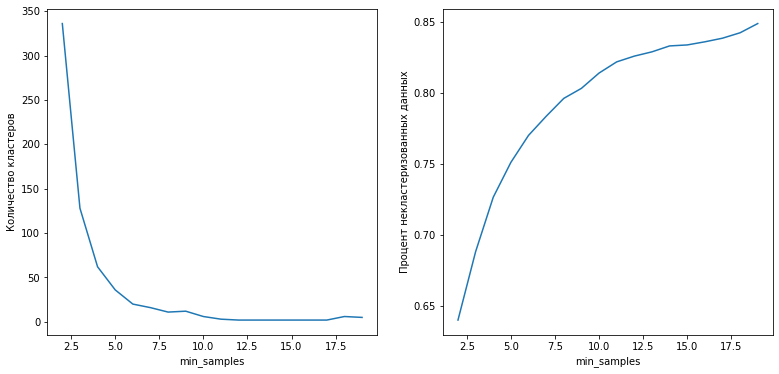

In [20]:
samples = np.arange(2, 20, 1)
info = []
for sample in samples:
    clustering = DBSCAN(min_samples=sample).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])
    
plot_two(samples, info, 'min_samples')

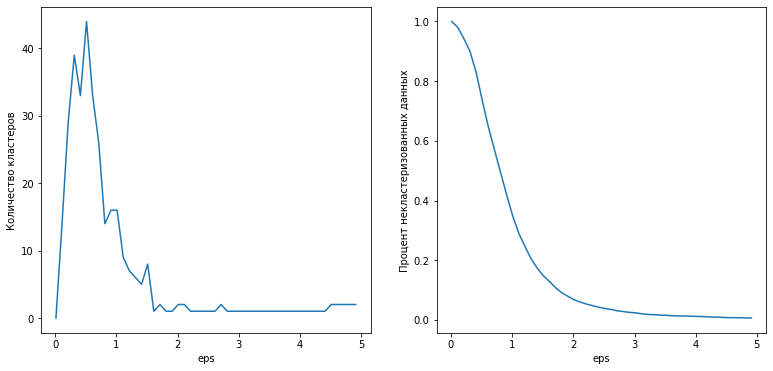

In [24]:
eps_ = np.arange(0.01, 5.0, 0.1)
info = []
for eps in eps_:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])
    
plot_two(eps_, info, 'eps')

In [25]:
samples = np.arange(1, 4, 1)
eps_ = np.arange(1.5, 2.5, 0.1)
info = {}
for sample in samples:
    for eps in eps_:
        clustering = DBSCAN(eps=eps ,min_samples=sample, n_jobs=-1).fit(scaled_data)
        labels_set = set(clustering.labels_)
        info[(sample, eps)]= [len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))]
        
print('samples, eps_ -> n_clusters, non_clustered')
for key, value in info.items():
    if value[0]>=5 and value[0]<=7 and value[1]<=0.12:
        print(key, value)

samples, eps_ -> n_clusters, non_clustered
(3, 2.0000000000000004) [6, 0.06287633163501621]


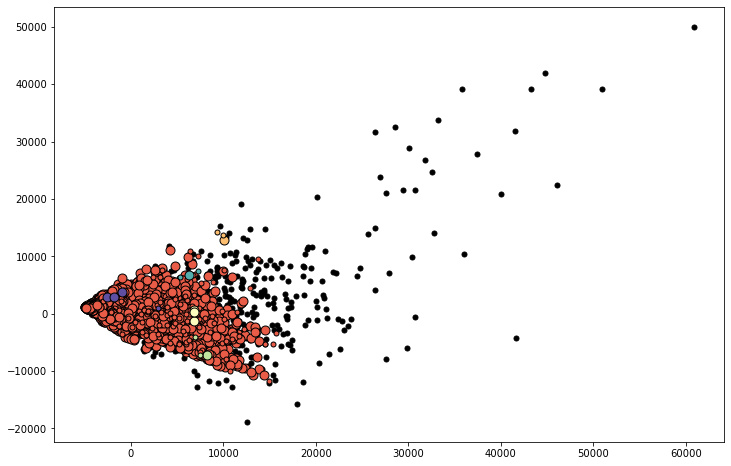

In [26]:
clustering = DBSCAN(eps=2, min_samples=3, n_jobs=-1).fit(scaled_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=9)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

In [29]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, -1}
6
6.310792033348773


In [32]:
pca_data = PCA(n_components=2).fit_transform(data)
def plot_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')
    
    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

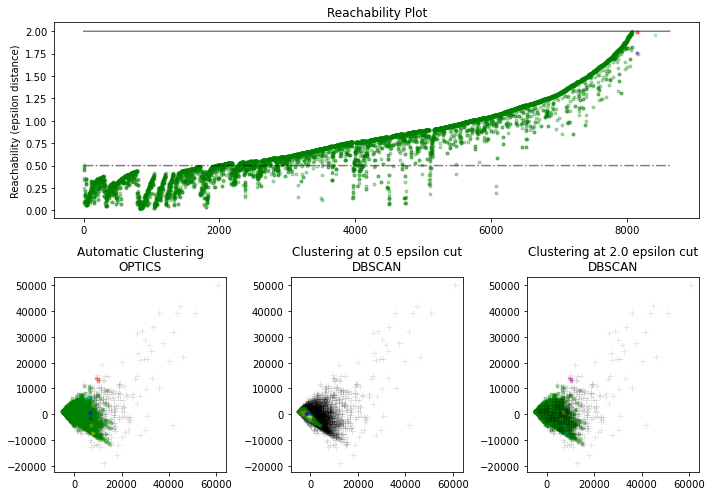

In [33]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)
plot_optics(clustering)

In [57]:
clustering = OPTICS(metric='cosine', min_samples=30, max_eps=3).fit(scaled_data)

labels = set(clustering.labels_)

print("Number of clusters", len(set(clustering.labels_)) -1)
print("Non clustered", 100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

max_ = 0
for label in labels:
    curr = list(clustering.labels_).count(label)
    if label != -1 and max_ < list(clustering.labels_).count(label):
        max_ = curr

print("Greatest", 100 * max_ / len(list(clustering.labels_)))

Number of clusters 11
Non clustered 91.53543307086615
Greatest 1.4705882352941178
